In [2]:
import sys
sys.path.append("/tf/notebooks/PRML")

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

from prml.rv import Gaussian, Uniform
from prml.sampling import metropolis, metropolis_hastings, rejection_sampling, sir

np.random.seed(1234)

## 11.1.2 Rejection sampling
* https://untitledtblog.tistory.com/134

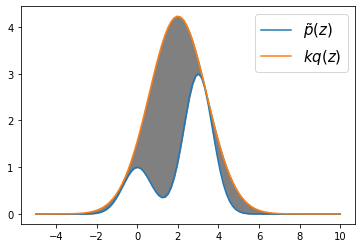

In [162]:
def func(x):
    return np.exp(-x ** 2) + 3 * np.exp(-(x - 3) ** 2)
x = np.linspace(-5, 10, 100)
rv = Gaussian(mu=np.array([2.]), var=np.array([2.]))
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.plot(x, 15 * rv.pdf(x), label=r"$kq(z)$")
plt.fill_between(x, func(x), 15 * rv.pdf(x), color="gray")
plt.legend(fontsize=15)

/root/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


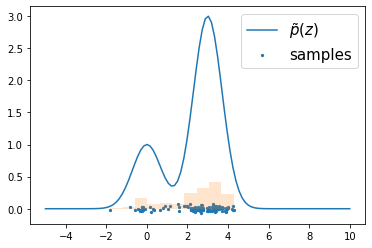

In [147]:
samples = rejection_sampling(func, rv, k=15, n=100)
# sample_value, cnt = np.unique(np.round(samples, 1), return_counts=True)    
# plt.scatter(sample_value, np.log(cnt))
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, normed=True, alpha=0.2)
plt.scatter(samples, np.random.normal(scale=.03, size=(100, 1)), s=5, label="samples")
plt.legend(fontsize=15)

In [183]:
def my_rejection_sampling(func, rv, k, n):
    assert hasattr(rv, "draw"), "the distribution has no method to draw random samples"
    sample = []
    while len(sample) < n:
        sample_candidate = rv.draw()
        accept_proba = func(sample_candidate) / (k * rv.pdf(sample_candidate)) # func dist에서 뽑은 샘플 / gaussian dist에서 뽑은 샘플
        r = random.random()
        print(sample_candidate, func(sample_candidate), (k * rv.pdf(sample_candidate)), accept_proba, r)
        if r < accept_proba:
            sample.append(sample_candidate[0])
    sample = np.asarray(sample)
    assert sample.shape == (n, rv.ndim), sample.shape
    return sample

[[3.47177057]] [[2.40138881]] [[2.46209084]] [[0.97534533]] 0.4842560101222142
[[1.44906736]] [[0.39317173]] [[3.92221437]] [[0.10024228]] 0.7439320733764163
[[5.50538388]] [[0.00563738]] [[0.19604894]] [[0.02875496]] 0.3649921958929232
[[0.79545009]] [[0.55438456]] [[2.94409938]] [[0.18830362]] 0.18410426776288868
[[2.24761658]] [[1.70963649]] [[4.16705514]] [[0.41027451]] 0.25594033934162796
[[0.24476585]] [[0.94336344]] [[1.95878886]] [[0.48160548]] 0.10704601541129244
[[2.86883281]] [[2.94909346]] [[3.5037032]] [[0.84170756]] 0.2562119653292354
[[6.42031562]] [[2.49173392e-05]] [[0.03199232]] [[0.00077885]] 0.9960743020161594
[[2.92541879]] [[2.98355124]] [[3.41589007]] [[0.87343304]] 0.5141194262647102
[[4.96326465]] [[0.06355842]] [[0.47109464]] [[0.13491646]] 0.1727748984089843
[[3.48168775]] [[2.37878889]] [[2.44412804]] [[0.97326688]] 0.32347708012507825
[[1.06558552]] [[0.3923931]] [[3.40163253]] [[0.11535435]] 0.41737454313781974
[[-0.79872226]] [[0.52837228]] [[0.59709832]]

[[0.21782033]] [[0.95496679]] [[1.9126639]] [[0.49928625]] 0.010141010450310017
[[4.23486073]] [[0.65294086]] [[1.21395965]] [[0.53786043]] 0.9642410006355361
[[1.21413193]] [[0.35258002]] [[3.62603919]] [[0.09723558]] 0.654149724567508
[[2.91897766]] [[2.98056999]] [[3.42605034]] [[0.86997262]] 0.43704312646108534
[[3.18506608]] [[2.89903054]] [[2.97856808]] [[0.97329672]] 0.1809702404256539
[[4.58802371]] [[0.24094008]] [[0.79300274]] [[0.30383259]] 0.5789159147859356
[[2.38085673]] [[2.04819978]] [[4.08072682]] [[0.50192034]] 0.9315479085871868
[[-0.61453643]] [[0.68547328]] [[0.76612334]] [[0.89472968]] 0.1520450634317041
[[0.93961559]] [[0.4565904]] [[3.1945119]] [[0.14292963]] 0.42102279074701354
[[1.62136835]] [[0.52058787]] [[4.08245122]] [[0.12751845]] 0.6234615159645425
[[2.89275058]] [[2.96592256]] [[3.46699137]] [[0.85547446]] 0.6305902593283217
[[1.87676129]] [[0.87907965]] [[4.21538586]] [[0.20854073]] 0.014969641713606818
[[1.9020671]] [[0.9255056]] [[4.22128829]] [[0.21

/root/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


(array([0.13630847, 0.05111568, 0.11926992, 0.06815424, 0.13630847,
        0.28965551, 0.47707966, 0.30669407, 0.0851928 , 0.03407712]),
 array([-0.79872226, -0.21181818,  0.3750859 ,  0.96198999,  1.54889407,
         2.13579815,  2.72270223,  3.30960631,  3.89651039,  4.48341447,
         5.07031855]),
 <a list of 10 Patch objects>)

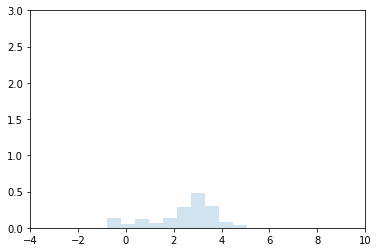

In [184]:
samples  = my_rejection_sampling(func, rv, 15, 100)
plt.xlim(-4, 10)
plt.ylim(0, 3)
plt.hist(samples, normed=True, alpha=0.2)

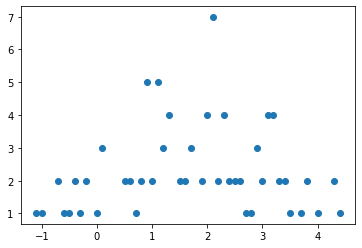

In [178]:
s_list = []
for idx in range(100):
    s_list.extend(rv.draw())
s_val, s_cnt = np.unique(np.round(s_list,1), return_counts=True)
plt.scatter(s_val, s_cnt)

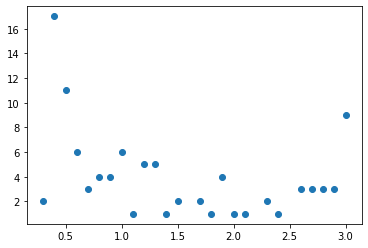

In [179]:
f_s_list = []
for s in s_list:
    f_s_list.extend(func(s))
f_s_val, f_s_cnt = np.unique(np.round(f_s_list,1), return_counts=True)
plt.scatter(f_s_val, f_s_cnt)